In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/seeds.csv')

In [3]:
df

area  perimeter  compactness  length  width  asymmetry_coefficient  \
0    15.26      14.84       0.8710   5.763  3.312                 2.2210   
1    14.88      14.57       0.8811   5.554  3.333                 1.0180   
2    14.29      14.09       0.9050   5.291  3.337                 2.6990   
3    13.84      13.94       0.8955   5.324  3.379                 2.2590   
4    16.14      14.99       0.9034   5.658  3.562                 1.3550   
5    14.38      14.21       0.8951   5.386  3.312                 2.4620   
6    14.69      14.49       0.8799   5.563  3.259                 3.5860   
7    14.11      14.10       0.8911   5.420  3.302                 2.7000   
8    16.63      15.46       0.8747   6.053  3.465                 2.0400   
9    16.44      15.25       0.8880   5.884  3.505                 1.9690   
10   15.26      14.85       0.8696   5.714  3.242                 4.5430   
11   14.03      14.16       0.8796   5.438  3.201                 1.7170   
12   13.89      14.02       0.8880   5.439  3.199                 3.9860   
13   13.78      14.06       0.8759   5.479  3.156                 3.1360   
14   13.74      14.05       0.8744   5.482  3.114                 2.9320   
15   14.59      14.28       0.8993   5.351  3.333                 4.1850   
16   13.99      13.83       0.9183   5.119  3.383                 5.2340   
17   15.69      14.75       0.9058   5.527  3.514                 1.5990   
18   14.70      14.21       0.9153   5.205  3.466                 1.7670   
19   12.72      13.57       0.8686   5.226  3.049                 4.1020   
20   14.16      14.40       0.8584   5.658  3.129                 3.0720   
21   14.11      14.26       0.8722   5.520  3.168                 2.6880   
22   15.88      14.90       0.8988   5.618  3.507                 0.7651   
23   12.08      13.23       0.8664   5.099  2.936                 1.4150   
24   15.01      14.76       0.8657   5.789  3.245                 1.7910   
25   16.19      15.16       0.8849   5.833  3.421                 0.9030   
26   13.02      13.76       0.8641   5.395  3.026                 3.3730   
27   12.74      13.67       0.8564   5.395  2.956                 2.5040   
28   14.11      14.18       0.8820   5.541  3.221                 2.7540   
29   13.45      14.02       0.8604   5.516  3.065                 3.5310   
..     ...        ...          ...     ...    ...                    ...   
180  11.41      12.95       0.8560   5.090  2.775                 4.9570   
181  12.46      13.41       0.8706   5.236  3.017                 4.9870   
182  12.19      13.36       0.8579   5.240  2.909                 4.8570   
183  11.65      13.07       0.8575   5.108  2.850                 5.2090   
184  12.89      13.77       0.8541   5.495  3.026                 6.1850   
185  11.56      13.31       0.8198   5.363  2.683                 4.0620   
186  11.81      13.45       0.8198   5.413  2.716                 4.8980   
187  10.91      12.80       0.8372   5.088  2.675                 4.1790   
188  11.23      12.82       0.8594   5.089  2.821                 7.5240   
189  10.59      12.41       0.8648   4.899  2.787                 4.9750   
190  10.93      12.80       0.8390   5.046  2.717                 5.3980   
191  11.27      12.86       0.8563   5.091  2.804                 3.9850   
192  11.87      13.02       0.8795   5.132  2.953                 3.5970   
193  10.82      12.83       0.8256   5.180  2.630                 4.8530   
194  12.11      13.27       0.8639   5.236  2.975                 4.1320   
195  12.80      13.47       0.8860   5.160  3.126                 4.8730   
196  12.79      13.53       0.8786   5.224  3.054                 5.4830   
197  13.37      13.78       0.8849   5.320  3.128                 4.6700   
198  12.62      13.67       0.8481   5.410  2.911                 3.3060   
199  12.76      13.38       0.8964   5.073  3.155                 2.8280   
200  12.38      13.44       0.8609   5.219  2.989     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
area                     210 non-null float64
perimeter                210 non-null float64
compactness              210 non-null float64
length                   210 non-null float64
width                    210 non-null float64
asymmetry_coefficient    210 non-null float64
groove_length            210 non-null float64
grain_variety            210 non-null object
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


In [7]:
df['grain_variety'].unique()

array(['Kama wheat', 'Rosa wheat', 'Canadian wheat'], dtype=object)

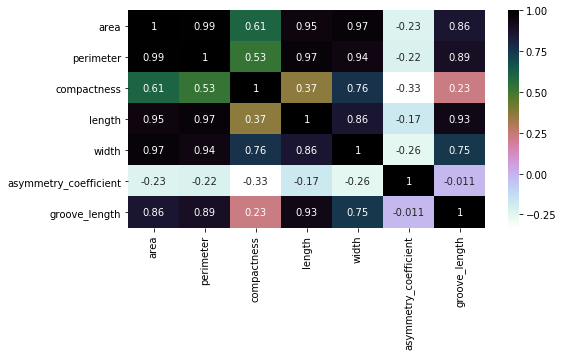

In [6]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

# Pair plot to find feature set

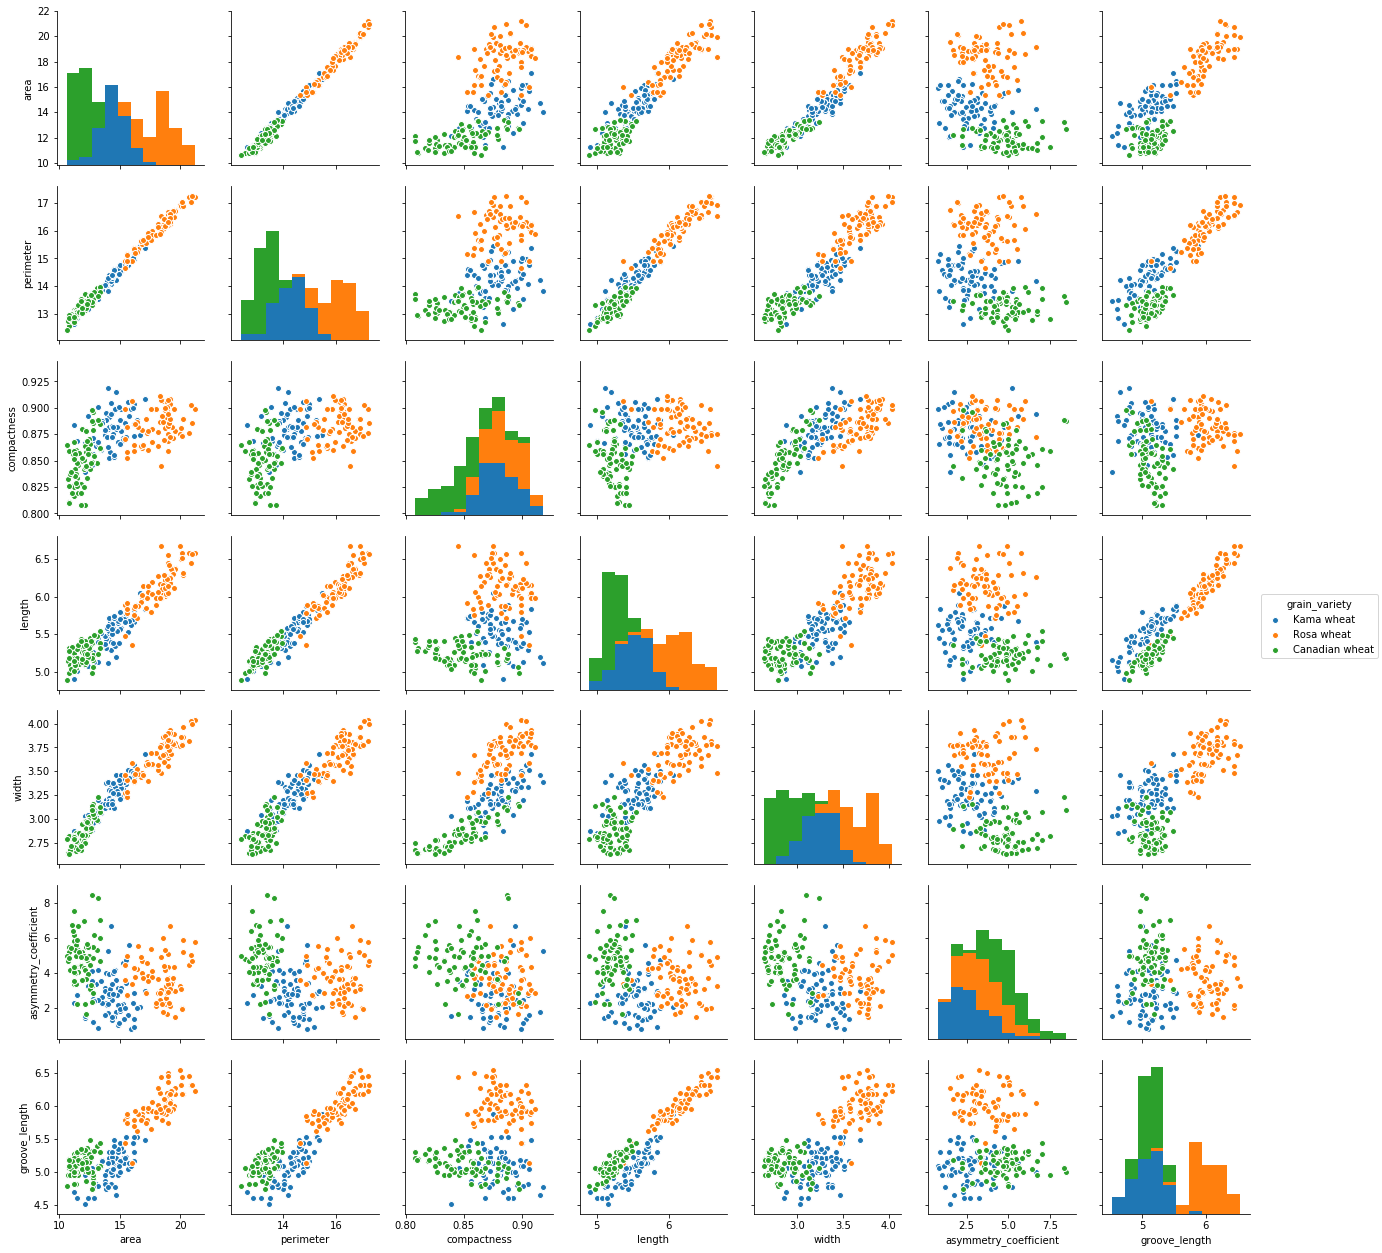

In [9]:
sns.pairplot(df,hue="grain_variety")

Clearly the pairplot shows grove_length and length to be a distinguishing features and lets build our classifier with them.

# Import Modules : sklearn

In [19]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

from sklearn.metrics import confusion_matrix #for confusion matrix

In [12]:
train, test = train_test_split(df, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(147, 8)
(63, 8)


# Taking Feature set as all the parameters

In [17]:
train_x = train[['area','perimeter','compactness','length','width','asymmetry_coefficient','groove_length']]
train_y = train['grain_variety']

test_x = test[['area','perimeter','compactness','length','width','asymmetry_coefficient','groove_length']]
test_y = test['grain_variety']

# SVM

In [18]:
model = svm.SVC()
model.fit(train_x,train_y)
prediction = model.predict(test_x)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
confusion_matrix(test_y, prediction)

array([[18,  2,  0],
       [ 3, 13,  1],
       [ 0,  3, 23]])

In [21]:
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.8571428571428571


# Decision tree

In [24]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
prediction = model.predict(test_x)


In [25]:
confusion_matrix(test_y, prediction)

array([[17,  3,  0],
       [ 3, 13,  1],
       [ 0,  1, 25]])

In [26]:
print('The accuracy of the Decision Tree is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.873015873015873


# KNN

In [31]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(train_x,train_y)
prediction = model.predict(test_x)

In [32]:
confusion_matrix(test_y,prediction)

array([[19,  1,  0],
       [ 5, 11,  1],
       [ 0,  3, 23]])

In [34]:
print("The acvuracy of the KNN is",metrics.accuracy_score(prediction,test_y))

The acvuracy of the KNN is 0.8412698412698413


# Taking only length and grove_length as the features

In [65]:
train_x = train[['length','groove_length']]
train_y = train['grain_variety']

test_x = test[['length','groove_length']]
test_y = test['grain_variety']

# SVM

In [36]:
model = svm.SVC()
model.fit(train_x,train_y)
prediction = model.predict(test_x)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
confusion_matrix(test_y,prediction)

array([[20,  0,  0],
       [ 3, 13,  1],
       [ 1,  0, 25]])

In [38]:
print("The accuracy of SVM classifier is ",metrics.accuracy_score(prediction,test_y))

The accuracy of SVM classifier is  0.9206349206349206


We see the accuracy of SVM classifier is increased by deacreasing the feature set

# Decision Tree

In [42]:
model = DecisionTreeClassifier()
model.fit(train_x,train_y)
prediction = model.predict(test_x)

In [44]:
confusion_matrix(test_y,prediction)

array([[17,  3,  0],
       [ 2, 14,  1],
       [ 0,  1, 25]])

In [45]:
print("The accuracy of Decision Tree Claasifier is ",metrics.accuracy_score(prediction,test_y))

The accuracy of Decision Tree Claasifier is  0.8888888888888888


# KNN

n=1

In [66]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(train_x,train_y)
prediction = model.predict(test_x)
accuracy = metrics.accuracy_score(prediction,test_y)
print("The accuracy with k=2",accuracy)

The accuracy with k=2 0.873015873015873


n=2

In [67]:
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(train_x,train_y)
prediction = model.predict(test_x)
accuracy = metrics.accuracy_score(prediction,test_y)
print("The accuracy with k=2",accuracy)

The accuracy with k=2 0.8888888888888888


In [68]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(train_x,train_y)
prediction = model.predict(test_x)

In [69]:
confusion_matrix(test_y,prediction)

array([[19,  1,  0],
       [ 3, 13,  1],
       [ 0,  2, 24]])

In [70]:
print('The accuracy of KNN Classifier is ',metrics.accuracy_score(prediction,test_y))

The accuracy of KNN Classifier is  0.8888888888888888


n = 4

In [71]:
model = KNeighborsClassifier(n_neighbors =4)
model.fit(train_x,train_y)
prediction = model.predict(test_x)
accuracy = metrics.accuracy_score(prediction,test_y)
print("The accuracy with k=2",accuracy)

The accuracy with k=2 0.9047619047619048


n =5 

In [72]:
model = KNeighborsClassifier(n_neighbors =5)
model.fit(train_x,train_y)
prediction = model.predict(test_x)
accuracy = metrics.accuracy_score(prediction,test_y)
print("The accuracy with k=2",accuracy)

The accuracy with k=2 0.8888888888888888


n = 6


In [73]:
model = KNeighborsClassifier(n_neighbors =6)
model.fit(train_x,train_y)
prediction = model.predict(test_x)
accuracy = metrics.accuracy_score(prediction,test_y)
print("The accuracy with k=2",accuracy)

The accuracy with k=2 0.9047619047619048


n = 7

In [74]:
model = KNeighborsClassifier(n_neighbors =7)
model.fit(train_x,train_y)
prediction = model.predict(test_x)
accuracy = metrics.accuracy_score(prediction,test_y)
print("The accuracy with k=2",accuracy)

The accuracy with k=2 0.9047619047619048


n = 8

In [75]:
model = KNeighborsClassifier(n_neighbors =8)
model.fit(train_x,train_y)
prediction = model.predict(test_x)
accuracy = metrics.accuracy_score(prediction,test_y)
print("The accuracy with k=2",accuracy)

The accuracy with k=2 0.9047619047619048


# Thus we see that limiting the feature set helps in imporoving the Classifiers 